# Tutorial

<font color="red">This is Session 0, a tutorial session where **nothing** needs to be returned at the end.</font>

Note: the neural network part is based on https://github.com/pytorch/examples/tree/main/mnist.

* [Popular Libraries](#Popular-Libraries-)
* [Why PyTorch](#Why-PyTorch-)
* [Environment Installation](#Environment-Installation-)
* [PyTorch Tutorial](#PyTorch-Tutorial-)
    * [PyTorch Tensor](#PyTorch-Tensor-)
    * [Tensor Manipulations](#Tensor-Manipulations-)
* [Neural Network Tutorial](#Neural-Network-Tutorial-)
    * [Load and Preprocess Data](#Load-and-Preprocess-Data-)
    * [Define model](#Define-model-)
    * [Basic Optimization Loop](#Basic-optimization-loop-)
    * [Evaluate Models Performance](#Evaluate-Models-Performance-)
* [More information](#More-information-)
* [Returning Exercises](#Returning-exercises-)

## Popular Libraries <a class="anchor" id="popular-libraries"></a>

**PyTorch** – Open-source deep learning framework.  
- **torch** – Core library for tensor operations, autograd, and deep learning models.  
- **torchvision** – Tools for image processing, datasets, and pre-trained vision models.  

**NumPy** – Numerical computing library that provides array operations and mathematical functions.  

**Matplotlib** – Visualisation library for creating plots, graphs, and charts to analyze data.

**SciPy** – Tools for optimization, integration, interpolation, and other common scientific tasks

**tqdm** – Adds progress bars to loops and tasks for better tracking.  

**Jupyter** – Interactive notebook environment for coding in a web-based interface.  


## Why PyTorch <a class="anchor" id="why-pytorch"></a>

- Open-source.
- Most popular deep learning framework on https://paperswithcode.com/trends
- Simple and Python-friendly.
- Supports GPU acceleration. (GPU is not needed for this course)
- Some contributors: Meta, Microsoft, OpenAI, AMD, Nvidia...
- Frequent updates and support.  
- Includes `torchvision`, `torchaudio`, `TorchText`.

## Environment Installation <a class="anchor" id="environment-installation"></a>

**1. Base Environment & Tools Setup**

- To manage Python and packages, we recommend **Miniconda**.
- https://repo.anaconda.com/miniconda/
- We will work with .ipynb files, we recommend **Jupyter Notebook/Lab**.
- This tutorial goes over recommended installations.
- You are free to use your setup. Make sure your setup supports installing required libraries/versions etc. <font color="red">An old package manager may use outdated Python and libraries, which can cause issues in the long term. If you have been using the same version for a long time, we recommend updating Conda or your package manager first.</font>

---

**2. Open Terminal & Check Base Environment**

- After Miniconda installation, open a new terminal.
- See the tag `base` on left, indicating the default environment.
- To avoid environment conflicts, we will create a new environment for the course.

---

**3. Create a New Environment**

**Option 1:** Create an Environment Manually

`
conda create --name my_env_name python=3.10
`

- If you follow this option, you must install required libraries manually.
- **my_env_name** → Replace with your preferred environment name.
- **python=3.10** → Specifies Python version 3.10 for this environment.

**Option 2:** Create an Environment from a YAML File

Run the following command to create an environment from a `.yml` / `.yaml` file:

`
conda env create -f environment.yml
`

---

**4. Activate the Environment**

- Check available environments:

`
conda env list
`

- Activate environment:

`
conda activate my_env_name
`

---

**5. Verify Python Version**

After creating the environment, check if Python is correctly installed:

`
python --version
`

---

**6. Install Packages in the Environment**

- Once the environment is activated, you can install additional packages.

- PyTorch is intentionally not included in the YAML file.

- We will manually install it to see an example of manual package installation.

- Find version you need: https://pytorch.org/get-started/locally/

- Run the command in your terminal while the environment is active.

---

**7. CPU vs. GPU Installation**

This course is designed to run on **CPU**. If you install the **GPU version**, you will need **GPU drivers, CUDA, cuDNN..** (not covered in this course).

Later examples will demonstrate how to write **code that works on both CPU & GPU**. However, for homeworks, **you do not need to write GPU-compatible code**.

---

### Summary of Steps
**1. Install Miniconda** from [Miniconda Download](https://repo.anaconda.com/miniconda/).

**2. Open terminal** and verify `base` environment is active.

**3. Create a new environment**:
   - `conda create --name my_env_name python=3.10` and install libraries manually,
   - OR use a `.yml` file: `conda env create -f environment.yaml`

**4. Activate the environment**: `conda activate my_env_name`

**5. Verify Python version**: `python --version`

**6. Install PyTorch**:
   - Visit [PyTorch Install](https://pytorch.org/get-started/locally/).
   - CPU is enough for this course, but an optional GPU setup is possible.
   - Run the recommended installation command.

## PyTorch Tutorial <a class="anchor" id="pytorch-tutorial"></a>

- Activate environment.
- Open Jupyter Notebook by typing `jupyter notebook` to work on IPYNB file.
- Check if `torch` is installed and its version.

In [1]:
import torch
print(torch.__version__)

2.6.0+cpu


### PyTorch Tensor <a class="anchor" id="pytorch-tensor"></a>

- Fundamental data structures in deep learning libraries.
- Represent data in a numerical way.
- Can be processed on CPUs or GPUs.
- PyTorch has a detailed [Tensor](https://pytorch.org/docs/stable/tensors.html) documentation page.

In [2]:
tensor_1d = torch.tensor([1, 2, 3])

print("Device:", tensor_1d.device)
print("Shape:", tensor_1d.shape)
print("Number of dimensions (ndim):", tensor_1d.ndim)
print("Data type (dtype):", tensor_1d.dtype)

Device: cpu
Shape: torch.Size([3])
Number of dimensions (ndim): 1
Data type (dtype): torch.int64


In [3]:
tensor_2d = torch.tensor([[1,  2,  3],
                          [10, 11, 12]])

print("Device:", tensor_2d.device)
print("Shape:", tensor_2d.shape)
print("Number of dimensions (ndim):", tensor_2d.ndim)
print("Data type (dtype):", tensor_2d.dtype)

Device: cpu
Shape: torch.Size([2, 3])
Number of dimensions (ndim): 2
Data type (dtype): torch.int64


In [4]:
# Changed 1 to 1.1
tensor_2d_decimal = torch.tensor([[1.1,  2,  3],
                                  [10, 11, 12]])

print("Device:", tensor_2d_decimal.device)
print("Shape:", tensor_2d_decimal.shape)
print("Number of dimensions (ndim):", tensor_2d_decimal.ndim)
print("Data type (dtype):", tensor_2d_decimal.dtype)

Device: cpu
Shape: torch.Size([2, 3])
Number of dimensions (ndim): 2
Data type (dtype): torch.float32


In [5]:
# Features of tensors can be modified
device = "cuda" if torch.cuda.is_available() else "cpu"

tensor_2d_modified = torch.tensor([[1, 2, 3],
                                   [10, 11, 12]],
                                  dtype=torch.float32,
                                  device=device,
                                  requires_grad=True)

print("Device:", tensor_2d_modified.device)
print("Shape:", tensor_2d_modified.shape)
print("Number of dimensions (ndim):", tensor_2d_modified.ndim)
print("Data type (dtype):", tensor_2d_modified.dtype)
# <tensor>.requires_grad=True tells PyTorch to compute gradients for this tensor during backpropagation
print("Requires gradient:", tensor_2d_modified.requires_grad)

Device: cpu
Shape: torch.Size([2, 3])
Number of dimensions (ndim): 2
Data type (dtype): torch.float32
Requires gradient: True


In [6]:
# .item() extract the number from single element tensor
x = torch.tensor(42)
print("Tensor x:", x)
print("dtype of the tensor:", x.dtype)

value = x.item()
print("Value extracted with .item():", value)
print("Type of the extracted value:", type(value))

Tensor x: tensor(42)
dtype of the tensor: torch.int64
Value extracted with .item(): 42
Type of the extracted value: <class 'int'>


### Tensor Manipulations <a class="anchor" id="tensor-manipulations"></a>

In [7]:
# Initial data
data = torch.tensor([[1., 2., 3.],
                     [4., 5., 6.]])
print(data)
print("Shape:", data.shape)
print("dtype:", data.dtype)
print("ndim:", data.ndim)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])
dtype: torch.float32
ndim: 2


In [8]:
# Slicing first column of all rows from data
slice_example = data[:, :1]
print(slice_example)
print("Shape:", slice_example.shape)

tensor([[1.],
        [4.]])
Shape: torch.Size([2, 1])


In [9]:
# Reshape data to 1D
reshaped = data.reshape(6)
print(reshaped)
print("Shape:", reshaped.shape)
print("ndim:", reshaped.ndim)

tensor([1., 2., 3., 4., 5., 6.])
Shape: torch.Size([6])
ndim: 1


In [10]:
# Reshape data to 2D
reshaped = data.reshape(1, 6)
print(reshaped)
print("Shape:", reshaped.shape)
print("ndim:", reshaped.ndim)

tensor([[1., 2., 3., 4., 5., 6.]])
Shape: torch.Size([1, 6])
ndim: 2


In [11]:
# Reshape data: "-1" tells pytorch to infer it
reshaped = data.reshape(-1, 2)
print(reshaped)
print("Shape:", reshaped.shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Shape: torch.Size([3, 2])


In [12]:
data # remember data

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [13]:
# Concatenate along dim=0
cat_dim0 = torch.cat([data, data], dim=0)
print(cat_dim0)
print("Shape:", cat_dim0.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([4, 3])


In [14]:
# Squeeze: removes any dimension of size 1
data_3d = data.reshape((1, 2, 3))
print("Data Reshaped to (1, 2, 3):")
print(data_3d)
print("Shape:", data_3d.shape)
print("ndim:", data_3d.ndim)

data_squeezed = data_3d.squeeze()
print("\nAfter squeeze:")
print(data_squeezed)
print("Shape:", data_squeezed.shape)
print("ndim:", data_squeezed.ndim)

# Unsqueeze: add a new dimension of size 1
data_unsqueezed = data_squeezed.unsqueeze(0)
print("\nAfter unsqueeze:")
print(data_unsqueezed)
print("Shape:", data_unsqueezed.shape)
print("ndim:", data_unsqueezed.ndim)

Data Reshaped to (1, 2, 3):
tensor([[[1., 2., 3.],
         [4., 5., 6.]]])
Shape: torch.Size([1, 2, 3])
ndim: 3

After squeeze:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])
ndim: 2

After unsqueeze:
tensor([[[1., 2., 3.],
         [4., 5., 6.]]])
Shape: torch.Size([1, 2, 3])
ndim: 3


In [15]:
# 2x3 tensor with random values from a standard normal distribution
rand_tensor = torch.randn((2, 3))
print("Random Tensor (randn):")
print(rand_tensor)
print("Shape:", rand_tensor.shape)

Random Tensor (randn):
tensor([[ 0.1656,  0.8948,  1.7010],
        [-1.2194, -0.2148, -2.2676]])
Shape: torch.Size([2, 3])


In [16]:
# 2x3 tensor filled with zeros
zeros_tensor = torch.zeros((2, 3))
print("Zeros Tensor:")
print(zeros_tensor)
print("Shape:", zeros_tensor.shape)

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape: torch.Size([2, 3])


In [17]:
# 2x3 tensor filled with ones
ones_tensor = torch.ones((2, 3))
print("Ones Tensor:")
print(ones_tensor)
print("Shape:", ones_tensor.shape)

Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Shape: torch.Size([2, 3])


In [18]:
# tensor with values from 0 to 10 (exclusive), i.e., 0,1,2,...,9
tensor_range = torch.arange(10)
print("Tensor with torch.arange(10):")
print(tensor_range)

Tensor with torch.arange(10):
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [19]:
# tensor with values from 0 to 10 (exclusive) with a step of 2: 0,2,4,6,8
tensor_range_step = torch.arange(0, 10, 2)
print("Tensor with torch.arange(0, 10, 2):")
print(tensor_range_step)

Tensor with torch.arange(0, 10, 2):
tensor([0, 2, 4, 6, 8])


In [20]:
# min, max functions

# Define a 1D tensor
x = torch.tensor([5, 3, 2, 1, 8, 9, 12])
print("Tensor x:")
print(x)

# Get the minimum and maximum value in the tensor
min_val = torch.min(x)
max_val = torch.max(x)
print("\nMinimum value in x:", min_val.item())
print("Maximum value in x:", max_val.item())

Tensor x:
tensor([ 5,  3,  2,  1,  8,  9, 12])

Minimum value in x: 1
Maximum value in x: 12


In [21]:
# rand_like function

# Define a 2x3 tensor
base_tensor = torch.tensor([[1, 2, 3],
                            [4, 5, 6]],
                           dtype=torch.float32)

# Create a new tensor with the same shape as 'base_tensor', but filled with random values in [0, 1)
rand_like_tensor = torch.rand_like(base_tensor)

print("Base Tensor:")
print(base_tensor)
print("Shape:", base_tensor.shape, "\n")

print("Random Tensor (created with rand_like):")
print(rand_like_tensor)
print("Shape:", rand_like_tensor.shape)

Base Tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3]) 

Random Tensor (created with rand_like):
tensor([[0.3989, 0.2070, 0.7332],
        [0.9444, 0.3537, 0.3838]])
Shape: torch.Size([2, 3])


In [22]:
# create a random 3x3 matrix
temp = torch.randn(3, 3)
# Multiply it by its transpose to get a symmetric matrix (like a covariance)
Sigma = temp @ temp.T
print("Symmetric matrix (Sigma = temp @ temp.T):")
print(Sigma)
print("Shape:", Sigma.shape)

Symmetric matrix (Sigma = temp @ temp.T):
tensor([[3.9840, 1.1351, 0.0571],
        [1.1351, 1.8647, 0.2224],
        [0.0571, 0.2224, 1.4986]])
Shape: torch.Size([3, 3])


In [23]:
# PyTorch's distribution API to sample from a multivariate normal
samples = torch.distributions.multivariate_normal.MultivariateNormal(
    loc=torch.zeros(3), 
    covariance_matrix=Sigma).rsample()
print("One sample from a multivariate normal with mean=0 and Sigma:")
print(samples)
print("Sample shape:", samples.shape)

One sample from a multivariate normal with mean=0 and Sigma:
tensor([-2.7502, -1.6804, -0.4668])
Sample shape: torch.Size([3])


## Neural Network Tutorial <a class="anchor" id="neural-network-tutorial"></a>

- **DISCLAIMER:** The rest of this notebook demonstrates a simple neural network implementation using PyTorch. The concepts introduced here will be covered in detail in upcoming lectures.

- **Data:** MNIST dataset, where each image is grayscale with a size of 28×28 pixels.
- **Task:** Build a neural network model to classify these images into 10 digit classes (0–9).

**Solution Steps**

1. Load and preprocess the MNIST data. Visualise a few sample images along with their labels and shapes.
3. Define model.
4. Train model with training set, that predicts the digit from each image.
5. Evaluate model's performance on a test set.

In [24]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
# fix random seeds for reproducibility
np.random.seed(1)
torch.manual_seed(1)

In [26]:
# set device. (not necessary for this course)
device = "cuda" if torch.cuda.is_available() else "cpu"

### Load and Preprocess Data <a class="anchor" id="load-and-preprocess-data"></a>

In [27]:
batch_size = 128

In [28]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

dataset1 = datasets.MNIST("data", train=True, download=True, transform=transform)
dataset2 = datasets.MNIST("data", train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size)

In [29]:
img, label = dataset1[0]
print("Image Shape: ", img.shape)
print("Image Label: ", label)

Image Shape:  torch.Size([1, 28, 28])
Image Label:  5


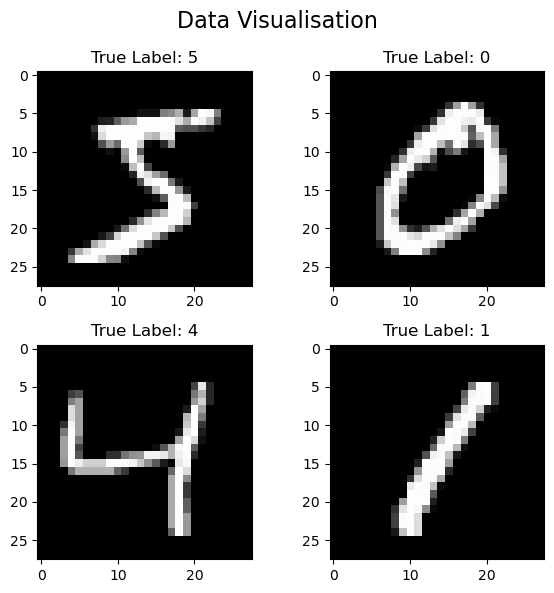

In [30]:
# Visualise data we are working with

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
# Add title
fig.suptitle("Data Visualisation", fontsize=16) 

# Loop over the first 4 images in the dataset
for i, ax in enumerate(axes.flatten()):
    img, label = dataset1[i]
    # Each image originally has torch.Size([1, 28, 28]) shape.
    ax.imshow(img.squeeze(), cmap="gray")
    # Set title for each subplot
    ax.set_title(f"True Label: {label}")

# Automatically adjust spacing between subplots
plt.tight_layout()
# Show plot
plt.show()

### Define model <a class="anchor" id="define-model"></a>

- A Fully connected neural network designed for classification tasks like MNIST digit recognition.
- Model expects input to be flattened into 784-dimensional vector (each image has 28x28 shape).
- Model outputs 10 neurons corresponding to 10 classes (digits 0-9).
- Has 3 Linear layers.
- Has 2 ReLU activation functions.

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 400), 
            nn.ReLU(), 
            nn.Linear(400, 400), 
            nn.ReLU(), 
            nn.Linear(400, 10)
        )

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.layers(x)
        return x

model = Net().to(device)

**Working with gradients**

- Below loop iterates over all trainable parameters (weights and biases) in the model.
- It prints gradient associated with each parameter which is computed after backpropagation.

In [32]:
# Model has six params in total
# 1 weight, 1 bias param per linear layer. Model has 3 linear layers.
for param in model.parameters():
    # Print gradients of each param
    print(param.grad)

None
None
None
None
None
None


In [33]:
# Create a dummy input tensor to simulate a batch of 2 images.
input = torch.randn((2, 784), device=device) # images are flattened

# # dummy loss
loss = torch.sum(model(input))

# Compute the gradients via backpropagation.
# This calculates how loss changes w.r.t. each parameter in the model.
loss.backward()

# Print gradients
for param in model.parameters():
    print(param.grad)

tensor([[ 0.0065, -0.0061, -0.0072,  ...,  0.0050,  0.0116,  0.0210],
        [-0.0184,  0.0028,  0.0375,  ..., -0.0288, -0.0671, -0.0926],
        [-0.0057,  0.0054,  0.0064,  ..., -0.0044, -0.0103, -0.0185],
        ...,
        [ 0.0525, -0.1325,  0.0388,  ..., -0.0437, -0.1011, -0.0182],
        [-0.0036,  0.0112, -0.0051,  ...,  0.0051,  0.0119,  0.0061],
        [ 0.0064, -0.0146,  0.0028,  ..., -0.0037, -0.0085,  0.0015]])
tensor([-1.1024e-02,  5.9864e-02,  9.7241e-03,  0.0000e+00,  9.5465e-02,
         9.7426e-02,  1.1574e-02, -4.6675e-02,  6.5430e-02, -4.1396e-02,
        -1.3757e-02,  0.0000e+00,  7.0411e-02,  0.0000e+00,  3.1817e-02,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.1864e-02,
        -1.6706e-02,  6.2334e-02, -4.2357e-02, -9.9804e-03,  0.0000e+00,
         1.0689e-02,  0.0000e+00,  2.2966e-02,  3.1646e-02,  1.7688e-02,
         0.0000e+00,  4.2324e-02,  0.0000e+00,  3.0203e-02, -3.9801e-02,
        -4.8417e-02, -1.3152e-02,  6.9150e-02,  2.6114e

In [34]:
# For each parameter in the model, add random noise to its existing gradient
for param in model.parameters():
    param.grad += torch.randn_like(param)
    print(param.grad)

tensor([[ 0.7628, -1.1152, -0.0899,  ..., -0.2894,  0.9058,  1.1348],
        [-0.6042,  0.0198, -0.6665,  ..., -0.5847, -0.1911,  0.3612],
        [ 2.2067,  1.3721, -0.1284,  ..., -0.4746, -0.9477,  0.6298],
        ...,
        [ 0.0727,  0.2161, -0.5722,  ..., -1.6264,  0.5801,  0.4671],
        [ 1.3423, -1.9695,  1.2200,  ..., -0.7267, -2.0478,  0.1924],
        [ 0.7057, -0.4455,  0.6319,  ...,  0.5382,  0.7824,  0.9663]])
tensor([-0.9982,  0.8160, -0.7544,  0.8091, -1.2163, -0.7655, -0.1191,  1.9221,
        -0.4677,  0.6915, -0.1015,  0.7058,  2.7172, -1.6156,  0.5550,  1.2531,
         1.1468,  1.0431,  0.5607,  0.6595,  0.5505, -0.5893,  0.5088,  1.0610,
        -0.1412, -0.3350,  0.4065,  0.1955,  0.7307,  0.5519,  0.6427, -1.6109,
         0.1700, -0.2317, -1.0877, -0.0698, -1.2753, -1.2869,  1.0607,  1.7469,
         0.3762, -0.3096,  0.4794, -0.6773,  0.8211,  0.5543,  0.0488, -2.3112,
        -0.3182, -0.6208,  0.2747,  0.2177, -0.5494,  0.1103, -2.5085,  1.2653,
      

### Basic optimization loop <a class="anchor" id="basic-optimization-loop"></a>

In [35]:
# Set hyperparameters: learning rate, logging interval, and number of epochs
lr = 3e-4
log_interval = 10
num_epochs = 5

# Create the model and move it to the device (CPU or GPU)
model = Net().to(device)
# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

In [36]:
def train(model, device, train_loader, optimizer, epoch):
    
    # Set model to training mode
    model.train()
    
    # Progress bar for the training loader
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    
    losses = []
    
    for batch_idx, (data, target) in pbar:
        
        # Move input data and labels to the selected device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad() # Clear previous gradients
        output = model(data) # Forward pass: compute model output
        loss = F.cross_entropy(output, target) # Compute cross-entropy loss
        loss.backward() # Backpropagate to compute gradients
        optimizer.step() # Update model parameters
        
        if batch_idx % log_interval == 0:
            pbar.set_postfix({"loss": loss.item()})
            
        losses.append(loss.item())
        
    return losses

In [37]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [38]:
all_losses = []
for epoch in range(num_epochs):
    all_losses.extend(train(model, device, train_loader, optimizer, epoch))
    test(model, device, test_loader)

100%|████████████████████████████| 469/469 [00:13<00:00, 34.84it/s, loss=0.0388]



Test set: Average loss: 0.1849, Accuracy: 9415/10000 (94%)



100%|█████████████████████████████| 469/469 [00:11<00:00, 39.42it/s, loss=0.026]



Test set: Average loss: 0.1240, Accuracy: 9600/10000 (96%)



100%|████████████████████████████| 469/469 [00:13<00:00, 35.93it/s, loss=0.0139]



Test set: Average loss: 0.0990, Accuracy: 9690/10000 (97%)



100%|███████████████████████████| 469/469 [00:11<00:00, 39.32it/s, loss=0.00758]



Test set: Average loss: 0.0874, Accuracy: 9724/10000 (97%)



100%|█████████████████████████████| 469/469 [00:10<00:00, 42.84it/s, loss=0.005]



Test set: Average loss: 0.0819, Accuracy: 9734/10000 (97%)



**Option 1 to save and load models**

In [39]:
torch.save(model, "mnist.pt")

In [40]:
model = torch.load("mnist.pt", weights_only=False)

**Option 2 to save and load models**

In [41]:
torch.save(model.state_dict(), "mnist_weights.pt")

In [42]:
model = Net()
model.load_state_dict(torch.load("mnist_weights.pt", weights_only=True))
model.to(device)

Net(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=10, bias=True)
  )
)

### Evaluate Models Performance <a class="anchor" id="evaluate-models-performance"></a>

In [43]:
test(model, device, test_loader)


Test set: Average loss: 0.0819, Accuracy: 9734/10000 (97%)



**Basic loss plotting**

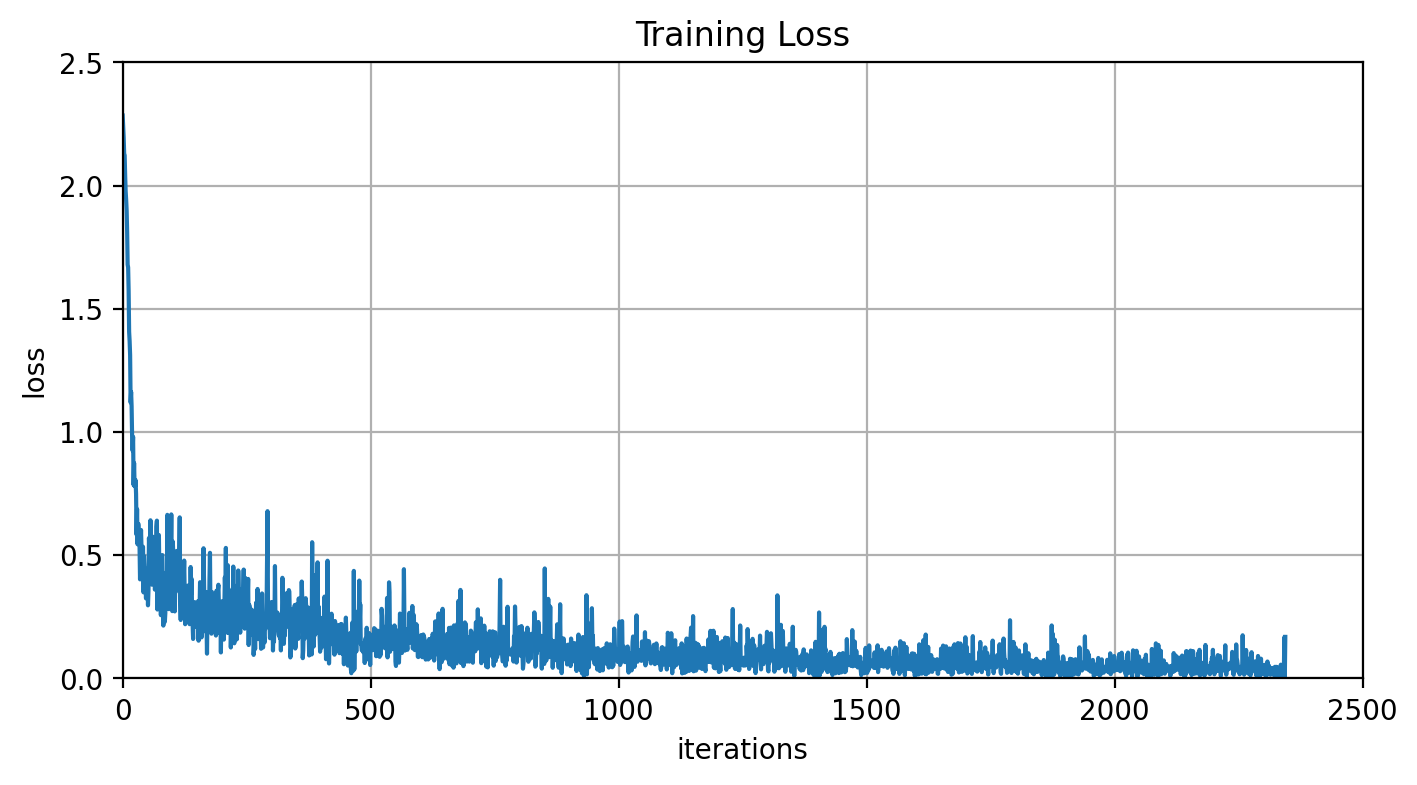

In [44]:
plt.figure(figsize=(8, 4), dpi=200)
plt.plot(all_losses)
plt.title('Training Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, 2500)
plt.ylim(0, 2.5)
plt.grid(True)
plt.show()

**Plotting predictions with images**

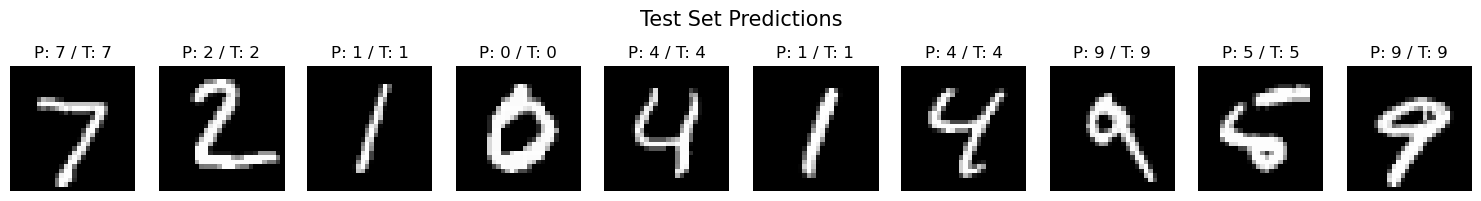

In [45]:
def plot_test_predictions(model, test_loader, device, num_images=10):
    model.eval()  # Set model to evaluation mode
    images, labels = next(iter(test_loader))  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():  # Disable gradient calculation
        outputs = model(images)  
        _, preds = torch.max(outputs, 1)  # Get the predicted class

    # Plot the images with predicted and true labels
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    fig.suptitle("Test Set Predictions", fontsize=15)
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].cpu().squeeze(), cmap="gray")  # Convert to CPU for plotting
        ax.set_title(f"P: {preds[i].item()} / T: {labels[i].item()}")
        ax.axis("off")
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_test_predictions(model, test_loader, device)

## More information <a class="anchor" id="more-information"></a>

* The main resources would be the official PyTorch resources
    1. https://pytorch.org/tutorials
    2. https://github.com/pytorch/examples

## Returning exercises <a class="anchor" id="returning-exercises"></a>

* Save the completed notebook, after running it once, as a PDF file (Export --> PDF).
* Submit both the notebook and the PDF
* Before submitting the PDF, ensure that the results are easy to read.
* For plots:
    * Always label the axes.
    * Follow any instructions regarding setting axis limits etc.